In [ ]:

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import uniform

# Load and split data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define model and hyperparameters
model = SVC()
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
param_dist = {'C': uniform(0.1, 100), 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

# Hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy').fit(X_train, y_train)
random_search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42).fit(X_train, y_train)
print("Grid Search Results")
print(grid_search.cv_results_)
print("Random Search Results")
print(random_search.cv_results_)


# Evaluate
best_grid = grid_search.best_estimator_
best_random = random_search.best_estimator_
y_pred_grid = best_grid.predict(X_test)
y_pred_random = best_random.predict(X_test)
print("Best Grid Search Results")
print(best_grid)
print("Best Random Search Results")
print(best_random)


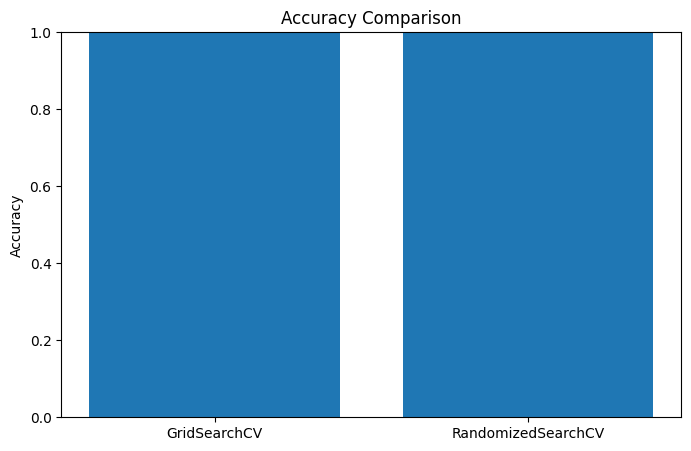

In [5]:
# Plot accuracy comparison
plt.figure(figsize=(8, 5))
plt.bar(['GridSearchCV', 'RandomizedSearchCV'], [accuracy_score(y_test, y_pred_grid), accuracy_score(y_test, y_pred_random)])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


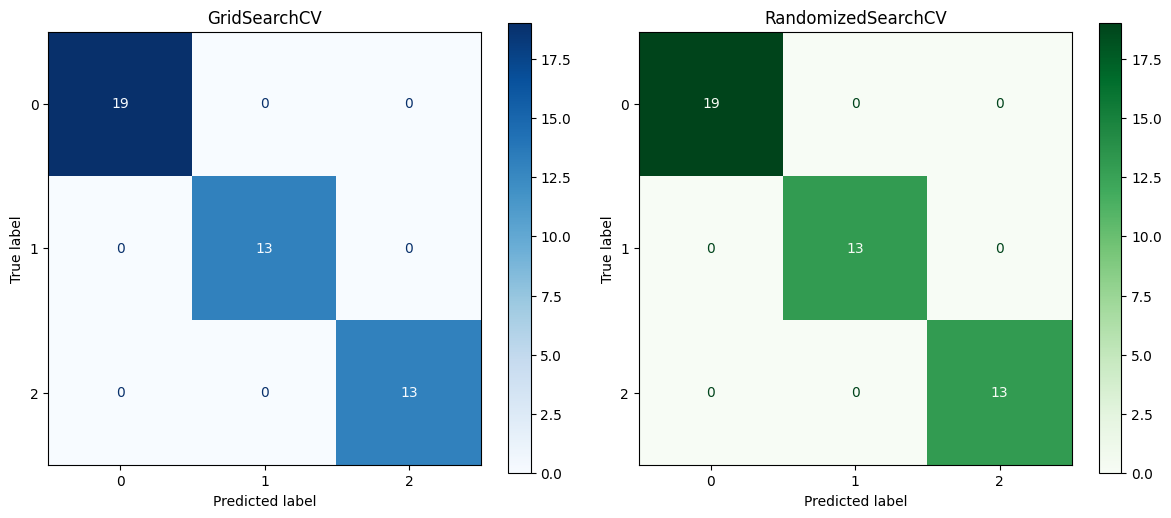

In [4]:
 #Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_grid)).plot(ax=axes[0], cmap='Blues')
axes[0].set_title('GridSearchCV')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_random)).plot(ax=axes[1], cmap='Greens')
axes[1].set_title('RandomizedSearchCV')
plt.tight_layout()
plt.show()

In [3]:

# Best parameters
print("GridSearchCV best params:", grid_search.best_params_)
print("RandomizedSearchCV best params:", random_search.best_params_)

GridSearchCV best params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
RandomizedSearchCV best params: {'C': np.float64(73.2993941811405), 'gamma': 'scale', 'kernel': 'linear'}
